In [ ]:
!pip install h5py numpy pandas six

In [1]:
import h5py
import numpy as np
import pandas as pd
from six.moves import cPickle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
train_file_list = [
    'origin/train.chunk.01'
    , 'origin/train.chunk.02', 'origin/train.chunk.03',
    'origin/train.chunk.04', 'origin/train.chunk.05', 'origin/train.chunk.06',
    'origin/train.chunk.07', 'origin/train.chunk.08', 'origin/train.chunk.09'
]

dev_file_list = [
    'origin/dev.chunk.01'
]

test_file_list = [
    'origin/test.chunk.01',
    'origin/test.chunk.02'
]

In [3]:
def get_cate_maxsize(range_cate):
    
    b_cate_max = 57
    m_cate_max = 552
    s_cate_max = 3190
    d_cate_max = 404
    
    if (range_cate == 'bcateid'):
        cate_size = b_cate_max
    elif (range_cate == 'mcateid'):
        cate_size = m_cate_max
        
    # s and d have zero(originally -1)
    elif (range_cate == 'scateid'):
        cate_size = s_cate_max + 1
    elif (range_cate == 'dcateid'):
        cate_size = d_cate_max + 1
    else :
        print("wrong id...")
        return
    
    return cate_size
    

In [4]:
def get_size(data_attr):
    
    file_list = []
    if data_attr == 'train':
        file_list = train_file_list
    elif data_attr == 'dev':
        file_list = dev_file_list
    elif data_attr == 'test':
        file_list = test_file_list   
    
    total_size = 0
    for file in file_list:
        with h5py.File(file, 'r') as read:
            total_size += read[data_attr]['pid'].size
    
    return total_size
        

In [5]:
def make_train_str():
    
    data_attr = 'train'
    
    print("Train file : {}".format(train_file_list))
    print("Dev file : {}".format(dev_file_list))
    print("Test file : {}".format(test_file_list))
    
    size = get_size('train')
    
    total_file_list = train_file_list
    
    with h5py.File("train_total.h5py", 'w') as write:
        write.create_dataset('product', (size, ), dtype='S612')
        write.create_dataset('maker', (size, ), dtype='S288')
        write.create_dataset('brand', (size, ), dtype='S131')
        write.create_dataset('model', (size, ), dtype='S149')
        write.create_dataset('bcateid', (size, ), dtype='i2')
        write.create_dataset('mcateid', (size, ), dtype='i2')
        write.create_dataset('scateid', (size, ), dtype='i2')
        write.create_dataset('dcateid', (size, ), dtype='i2')
        write.create_dataset('pid', (size, ))
        write.create_dataset('updttm', (size, ))
        write.create_dataset('price', (size, ))
        
        print("product shape : {}".format(write['product'].shape))
        
        pro_idx = 0
        mak_idx = 0
        bra_idx = 0
        mod_idx = 0
        b_idx = 0
        m_idx = 0
        s_idx = 0
        d_idx = 0
        
        for file in total_file_list:
            with h5py.File(file, 'r') as read:
                
                print("current read file : {}".format(file))
                
                target = read[data_attr]
                sz_pro = target['product'].shape[0]
                sz_mak = target['maker'].shape[0]
                sz_bra = target['brand'].shape[0]
                sz_mod = target['model'].shape[0]
                sz_b = target['bcateid'].shape[0]
                sz_m = target['mcateid'].shape[0]
                sz_s = target['scateid'].shape[0]
                sz_d = target['dcateid'].shape[0]
                
                write['product'][pro_idx:pro_idx+sz_pro] = target['product']
                write['maker'][mak_idx:mak_idx+sz_mak] = target['maker']
                write['brand'][bra_idx:bra_idx+sz_bra] = target['brand']
                write['model'][mod_idx:mod_idx+sz_mod] = target['model']
                write['bcateid'][b_idx:b_idx+sz_b] = target['bcateid']
                write['mcateid'][m_idx:m_idx+sz_m] = target['mcateid']
                write['scateid'][s_idx:s_idx+sz_s] = target['scateid']
                write['dcateid'][d_idx:d_idx+sz_d] = target['dcateid']
                
                pro_idx += sz_pro
                mak_idx += sz_mak
                bra_idx += sz_bra
                mod_idx += sz_mod
                b_idx += sz_b
                m_idx += sz_m
                s_idx += sz_s
                d_idx += sz_d

                print("success save file : {}".format(file))
    

In [24]:
with h5py.File('origin/train.chunk.01', 'r') as read:
    print(read['train']['product'].dtype)

|S612


In [8]:
make_train_str()

Train file : ['origin/train.chunk.01', 'origin/train.chunk.02', 'origin/train.chunk.03', 'origin/train.chunk.04', 'origin/train.chunk.05', 'origin/train.chunk.06', 'origin/train.chunk.07', 'origin/train.chunk.08', 'origin/train.chunk.09']
Dev file : ['origin/dev.chunk.01']
Test file : ['origin/test.chunk.01', 'origin/test.chunk.02']
product shape : (8134818,)
current read file : origin/train.chunk.01
success save file : origin/train.chunk.01
current read file : origin/train.chunk.02
success save file : origin/train.chunk.02
current read file : origin/train.chunk.03
success save file : origin/train.chunk.03
current read file : origin/train.chunk.04
success save file : origin/train.chunk.04
current read file : origin/train.chunk.05
success save file : origin/train.chunk.05
current read file : origin/train.chunk.06
success save file : origin/train.chunk.06
current read file : origin/train.chunk.07
success save file : origin/train.chunk.07
current read file : origin/train.chunk.08
success 

In [6]:
tr_read = h5py.File('train_total.h5py', 'r')
list(tr_read.keys())

['bcateid',
 'brand',
 'dcateid',
 'maker',
 'mcateid',
 'model',
 'product',
 'scateid']

In [7]:
pd_train = pd.DataFrame(columns = tr_read.keys())

In [8]:
!free

              total        used        free      shared  buff/cache   available
Mem:      206357056     7435260    88936908       10876   109984888   197072940
Swap:             0           0           0


In [9]:
for col in pd_train.columns:
    pd_train[col] = tr_read[col]
    if col in ['product', 'maker', 'brand', 'model']:
        pd_train[col] = pd_train[col].str.decode('utf-8')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
print("null은 아닌데 스트링이 없음....")
print("product : {}".format(pd_train[pd_train['product'] == '']['product'].count()))
print("maker : {}".format(pd_train[pd_train['maker'] == '']['maker'].count()))
print("brand : {}".format(pd_train[pd_train['brand'] == '']['brand'].count()))
print("model : {}".format(pd_train[pd_train['model'] == '']['model'].count()))

null은 아닌데 스트링이 없음....
product : 0
maker : 2196846
brand : 3930113
model : 2063425


In [76]:
product_size = pd_train['product'].map(lambda i: len(i))
maker_size = pd_train['maker'].map(lambda i: len(i))
brand_size = pd_train['brand'].map(lambda i: len(i))
model_size = pd_train['model'].map(lambda i: len(i))

Text(0.5, 1.0, 'model')

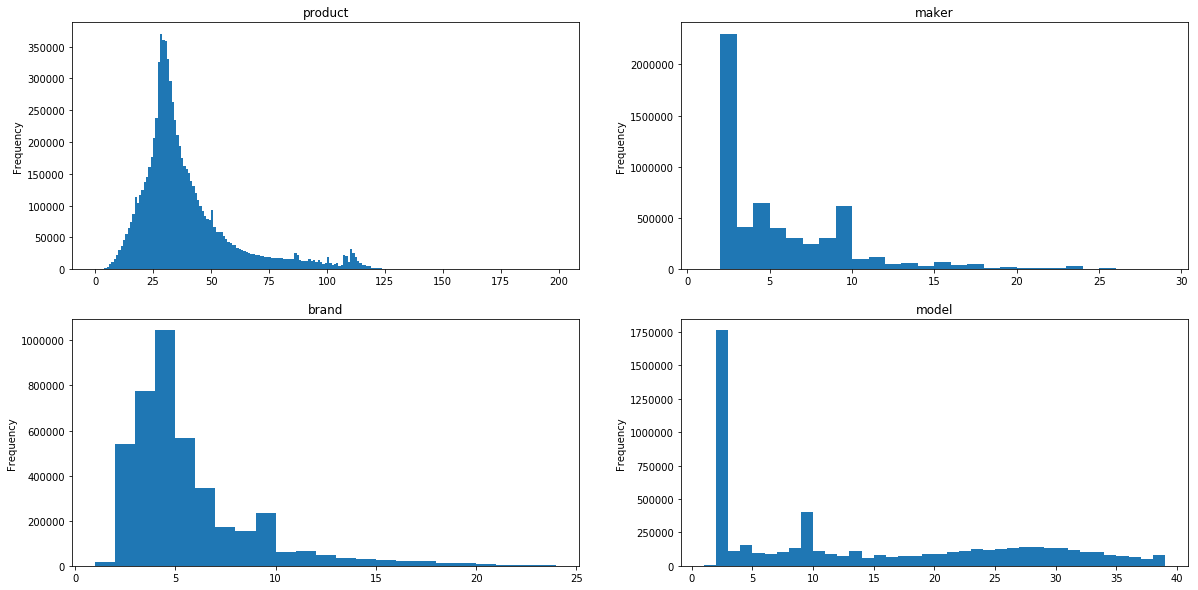

In [271]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

product_size.plot.hist(bins=np.arange(0, 200, 1), ax=ax[0][0])
maker_size.plot.hist(bins=np.arange(1, 30, 1), ax=ax[0][1])
brand_size.plot.hist(bins=np.arange(1, 25, 1), ax=ax[1][0])
model_size.plot.hist(bins=np.arange(1, 40, 1), ax=ax[1][1])

ax[0][0].set_title('product')
ax[0][1].set_title('maker')
ax[1][0].set_title('brand')
ax[1][1].set_title('model')

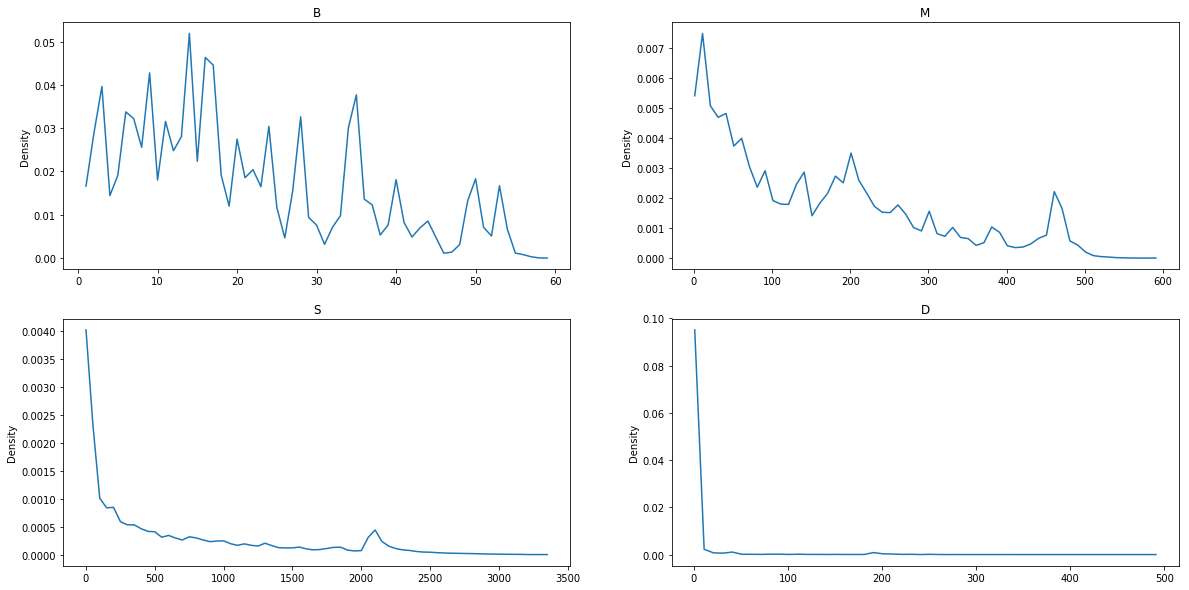

In [104]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

pd_train.bcateid.plot.kde(ind=np.arange(1,60,1), ax=ax[0][0])
pd_train.mcateid.plot.kde(ind=np.arange(1,600,10), ax=ax[0][1])
pd_train.scateid.plot.kde(ind=np.arange(1,3400,50), ax=ax[1][0])
pd_train.dcateid.plot.kde(ind=np.arange(1,500,10), ax=ax[1][1])

ax[0][0].set_title('B')
ax[0][1].set_title('M')
ax[1][0].set_title('S')
ax[1][1].set_title('D')

plt.show()

In [38]:
dcate_top = pd_train['dcateid'].value_counts() > 2000
# scate_bot = pd_train['scateid'].value_counts() > 2000
# mcate_bot = pd_train['mcateid'].value_counts() > 15000
# bcate_bot = pd_train['bcateid'].value_counts() > 100000

In [79]:
print(pd_train['dcateid'].value_counts())

-1      7376926
 5        72344
 10       60313
 8        53278
 6        50747
 4        29323
 14       26570
 39       23715
 195      22972
 190      17885
 41       15444
 19       12633
 186      11869
 188      10118
 187       9118
 31        9046
 20        9015
 12        8410
 22        8109
 30        7604
 204       7379
 108       6795
 2         6367
 197       6303
 205       6266
 13        6233
 46        5980
 191       5798
 40        5302
 199       5137
         ...   
 386         29
 243         24
 352         24
 319         24
 369         24
 267         23
 298         23
 403         23
 349         23
 245         23
 380         23
 342         22
 351         21
 354         20
 390         19
 400         19
 399         18
 387         18
 375         17
 394         17
 258         17
 402         17
 392         16
 401         15
 384         15
 397         14
 378         14
 330         14
 376         14
 404         11
Name: dcateid, Length: 4

In [39]:
# b_list = np.array(bcate_bot[bcate_bot==True].index)
# m_list = np.array(mcate_bot[mcate_bot==True].index)
# s_list = np.array(scate_bot[scate_bot==True].index)
d_list = np.array(dcate_top[dcate_top==True].index)

In [40]:
# print(b_list)
# print(m_list)
# print(s_list)
print(d_list)

[ -1   5  10   8   6   4  14  39 195 190  41  19 186 188 187  31  20  12
  22  30 204 108   2 197 205  13  46 191  40 199  24 184  17 225  34 201
 210  47  55  29 216  27 198  75 194 227  26 196  93  67  82  48 207  36
 212 192  54 137 208  66 116  15  61  42 124]


In [27]:
b_idx_list=[]
for idx in b_list:
    bi = np.array(pd_train[pd_train['bcateid'] == idx]['bcateid'].index)
    b_idx_list.append(bi)
b = np.concatenate(b_idx_list, axis=0)
b.shape

(7059080,)

In [28]:
m_idx_list=[]
for idx in m_list:
    mi = np.array(pd_train[pd_train['mcateid'] == idx]['mcateid'].index)
    m_idx_list.append(mi)
m = np.concatenate(m_idx_list, axis=0)
m.shape

(6408453,)

In [29]:
s_idx_list=[]
for idx in s_list:
    si = np.array(pd_train[pd_train['scateid'] == idx]['scateid'].index)
    s_idx_list.append(si)
s = np.concatenate(s_idx_list, axis=0)
s.shape

(4982630,)

In [86]:
d_idx_list = []
boundary = 2000
dcatesize = 405
for i in range(2, dcatesize):
    if pd_train['dcateid'].value_counts()[i] > boundary :
        di = np.array(pd_train[pd_train['dcateid'] == idx]['dcateid'].index) # 카테고리 별 인덱스 수
        di = np.random.choice(di, boundary)
        d_idx_list.append(di)
    else :
        di = np.array(pd_train[pd_train['dcateid'] == idx]['dcateid'].index) # 카테고리 별 인덱스 수
        di = np.random.choice(di, boundary, replace=True)
        d_idx_list.append(di)
    
d = np.concatenate(d_idx_list, axis=0)
d.shape # index 중복 포함


(806000,)

In [87]:
print(d[3])
np.random.shuffle(d) # shuffle

print(d[3])
d.shape

983763
7230130


(806000,)

In [88]:
# origin_pro = h5py.File('origin/X_train_product.h5py', 'r')
# origin_mak = h5py.File('origin/X_train_maker.h5py', 'r')
# origin_bra = h5py.File('origin/X_train_brand.h5py', 'r')
# origin_mod = h5py.File('origin/X_train_model.h5py', 'r')
origin_con = h5py.File('origin/X_train_concate_2.h5py', 'r')
# origin_img = h5py.File('origin/X_train_img_feat.h5py', 'r')

# origin_b = h5py.File('origin/y_train_bcateid.h5py', 'r')
# origin_m = h5py.File('origin/y_train_mcateid.h5py', 'r')
# origin_s = h5py.File('origin/y_train_scateid.h5py', 'r')
origin_d = h5py.File('origin/y_train_dcateid.h5py', 'r')

In [89]:
# np_pro = np.array(origin_pro['train'])
# np_mak = np.array(origin_mak['train'])
# np_bra = np.array(origin_bra['train'])
# np_mod = np.array(origin_mod['train'])
np_con = np.array(origin_con['train'])

# np_img = np.array(origin_img['train'])

# np_b = np.array(origin_b['train'])
# np_m = np.array(origin_m['train'])
# np_s = np.array(origin_s['train'])
np_d = np.array(origin_d['train'])

In [95]:
np_con_list = []
np_d_list = []
# index 따라 추출
for idx in d:
    if idx > np_con.shape[0]: # out of train range
        continue
    np_con_list.append(np_con[idx])
    np_d_list.append(np_d[idx])


In [102]:
np_con = np.array(np_con_list)
np_d = np.array(np_d_list)

In [103]:
print(np_con.shape)
print(np_d.shape)

(660754, 32)
(660754, 405)


In [42]:
# np_pro = np.delete(np_pro, b, 0)
# np_mak = np.delete(np_mak, b, 0)
# np_bra = np.delete(np_bra, b, 0)
# np_mod = np.delete(np_mod, b, 0)

# np_pro = np.delete(np_pro, m, 0)
# np_mak = np.delete(np_mak, m, 0)
# np_bra = np.delete(np_bra, m, 0)
# np_mod = np.delete(np_mod, m, 0)

# np_pro = np.delete(np_pro, s, 0)
# np_mak = np.delete(np_mak, s, 0)
# np_bra = np.delete(np_bra, s, 0)
# np_mod = np.delete(np_mod, s, 0)

# np_pro = np.delete(np_pro, d, 0)
# np_mak = np.delete(np_mak, d, 0)
# np_bra = np.delete(np_bra, d, 0)
# np_mod = np.delete(np_mod, d, 0)
# np_con = np.delete(np_con, d, 0)

# np_img_b = np.delete(np_img, b, 0)
# np_img_m = np.delete(np_img, m, 0)
# np_img_s = np.delete(np_img, s, 0)
# np_img_d = np.delete(np_img, d, 0)

# np_b = np.delete(np_b, b, 0)
# np_m = np.delete(np_m, m, 0)
# np_s = np.delete(np_s, s, 0)
# np_d = np.delete(np_d, d, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [43]:
# print(np_pro.shape)
# print(np_mak.shape)
# print(np_bra.shape)
# print(np_mod.shape)
# print(np_con.shape)

# print(np_img_b.shape)
# print(np_img_m.shape)
# print(np_img_s.shape)
# print(np_img_d.shape)

# print(np_b.shape)
# print(np_m.shape)
# print(np_s.shape)
# print(np_d.shape)


(101913, 2048)


In [104]:
path = 'dcate/'

In [105]:
h = h5py.File(path+'X_train_concate_uniform_d.h5py', 'w')
h.create_dataset('train', (np_con.shape[0], np_con.shape[1]), data=np_con)
h.close()

In [106]:
h = h5py.File(path+'y_dcateid_uniform_d.h5py', 'w')
h.create_dataset('train', (np_d.shape[0], np_d.shape[1]), data=np_d)
h.close()

## B cate

In [34]:
h = h5py.File(path+'X_train_product_low_for_d.h5py', 'w')
h.create_dataset('train', (np_pro.shape[0], np_pro.shape[1]), data=np_pro)
h.close()

In [35]:
h = h5py.File(path+'X_train_maker_low_for_d.h5py', 'w')
h.create_dataset('train', (np_mak.shape[0], np_mak.shape[1]), data=np_mak)
h.close()

In [36]:
h = h5py.File(path+'X_train_brand_low_for_d.h5py', 'w')
h.create_dataset('train', (np_bra.shape[0], np_bra.shape[1]), data=np_bra)
h.close()

In [37]:
h = h5py.File(path+'X_train_model_low_for_d.h5py', 'w')
h.create_dataset('train', (np_mod.shape[0], np_mod.shape[1]), data=np_mod)
h.close()

In [38]:
h = h5py.File(path+'X_train_concate_low_for_d.h5py', 'w')
h.create_dataset('train', (np_con.shape[0], np_con.shape[1]), data=np_con)
h.close()

In [39]:
h = h5py.File(path+'y_dcateid_low_for_d.h5py', 'w')
h.create_dataset('train', (np_d.shape[0], np_d.shape[1]), data=np_d)
h.close()

In [45]:
h = h5py.File(path+'X_img_low_for_d.h5py', 'w')
h.create_dataset('train', (np_img_d.shape[0], np_img_d.shape[1]), data=np_img_d)
h.close()

## M cate

In [25]:
!free

              total        used        free      shared  buff/cache   available
Mem:      206357056     5231216   116556068       10872    84569772   199277000
Swap:             0           0           0
